<a href="https://colab.research.google.com/github/belanasaikiran/Team-6-Big-Data-Project/blob/main/temp/Car_Make_Model_Detection_Classification_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Make & Model Detection:
This project aims to detect the make and model of a given car.  
We use Stanford Car DataSet for training the model. We have over 196 classes in total for model detection.

We are dealing with 12946 images of training data. 2000 ish images for testing.

**Team Members**:

*   Ariannah Black
*   Sai Kiran Belana
*   Ummea Salma
*   Md Ishtyaq Mahmud

The DataSet is structured in the following manner

```
DataSet
├── data
│   ├── meta.csv
│   ├── test.csv
│   └── train.csv
└── images
    ├── cars_test
    └── cars_train
```


## Todo:
- [x] Import the DataSet.
- [x] Preprocessing
- [x] Feature Selection
- [x] Model Selection
- [x] Training the Model
- [ ] Fine tune the Model
- [ ] Test the Model

In [1]:
# !rm -r DataSet/ A Simple reset call to delete DataSet folder. Use it at caution

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# !unzip gdrive/MyDrive/DataSet/DataSet.zip > /dev/null # output to null
# !unzip gdrive/MyDrive/Big\ Data\ Analytics\ Project\ \(Team6\)/DataSet/DataSet.zip > /dev/null # output to null
!unzip gdrive/MyDrive/BigDataAnalyticsProject/DataSet/DataSet.zip > /dev/null # output to null

Checking if image dataset is loaded

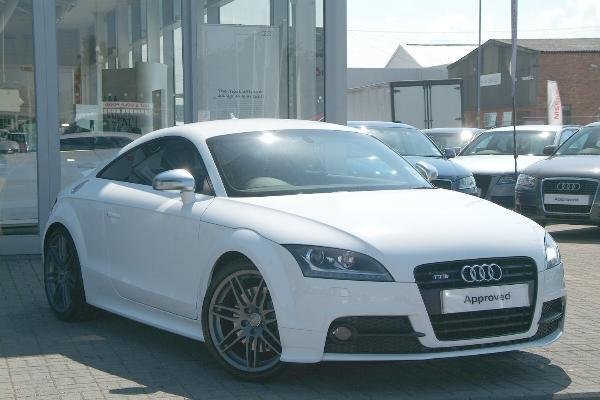

In [26]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('DataSet/images/cars_train/00001.jpg')
img

In [27]:
print(img.width, img.height)

600 400


In [28]:
import numpy as np
import pandas as pd

In [29]:
metadata = pd.read_csv("DataSet/data/meta.csv")

In [30]:
print("Meta Data: \n")
print("Head:")
print(metadata.head())
print("\n Info:")
print(metadata.info())
print("\n Columns:")
print(metadata.columns)

Meta Data: 

Head:
   Unnamed: 0                  class_name
0           1  AM General Hummer SUV 2000
1           2         Acura RL Sedan 2012
2           3         Acura TL Sedan 2012
3           4        Acura TL Type-S 2008
4           5        Acura TSX Sedan 2012

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  196 non-null    int64 
 1   class_name  196 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB
None

 Columns:
Index(['Unnamed: 0', 'class_name'], dtype='object')


## Load the Train & Test Datasets

### Train Data

In [31]:
train_data = pd.read_csv("DataSet/data/train.csv")

print("\n Train Data: \nHead: ")
train_data.head()
print("\nDescribe:")
print(train_data.describe())
print("\nInfo:")
print(train_data.info())
print("\nColumns:")
print(train_data.columns)
print("\nShape:")
print(train_data.shape)


 Train Data: 
Head: 

Describe:
         Unnamed: 0            x1            y1            x2            y2  \
count  12948.000000  12948.000000  12948.000000  12948.000000  12948.000000   
mean    3451.892339     64.701189    108.592833    638.598625    416.670683   
std     2200.262018     81.774972    106.195279    409.613163    272.818630   
min        0.000000      1.000000      1.000000     76.000000     41.000000   
25%     1618.000000     19.000000     42.000000    394.000000    250.000000   
50%     3236.500000     39.000000     80.000000    572.000000    361.000000   
75%     4906.250000     78.000000    138.000000    742.250000    475.000000   
max     8143.000000   1648.000000   1651.000000   5205.000000   3389.000000   

              class  
count  12948.000000  
mean      99.008573  
std       56.540538  
min        1.000000  
25%       50.000000  
50%       99.000000  
75%      148.000000  
max      196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

### Test Data

In [32]:
test_data = pd.read_csv("DataSet/data/test.csv") #load test data


print("\n Test Data: \nHead: ")
test_data.head()
print("\nDescribe:")
print(test_data.describe())
print("\nInfo:")
print(test_data.info())
print("\nColumns:")
print(test_data.columns)
print("\nShape:")
print(test_data.shape)


 Test Data: 
Head: 

Describe:
        Unnamed: 0           x1           y1           x2           y2  \
count  3237.000000  3237.000000  3237.000000  3237.000000  3237.000000   
mean   1618.000000    66.103491   106.835650   639.691999   417.637010   
std     934.585737    84.198376   106.736782   417.499266   279.758425   
min       0.000000     1.000000     1.000000    72.000000    49.000000   
25%     809.000000    18.000000    40.000000   389.000000   242.000000   
50%    1618.000000    39.000000    77.000000   573.000000   363.000000   
75%    2427.000000    80.000000   135.000000   763.000000   487.000000   
max    3236.000000   872.000000  1311.000000  7224.000000  3835.000000   

             class  
count  3237.000000  
mean     98.852950  
std      56.359186  
min       1.000000  
25%      51.000000  
50%      99.000000  
75%     148.000000  
max     196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 7 columns):

### Fixing the `fname` for one of the value in CSV

In [33]:
# fix the file names here
train_data.loc[9998, 'fname'] = '09999.jpg'

Split data into Training and validation set

In [34]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [35]:
train_data, validation_data = train_test_split(train_data, test_size=3237, shuffle=False) # Split the training Dataframe to train and validation

In [36]:
print("Training set size:", train_data.shape)
print("Validation set size:", validation_data.shape)

Training set size: (9711, 7)
Validation set size: (3237, 7)


In [37]:
print("\n Train Data: \nHead: ")
train_data.head()
print("\nDescribe:")
print(train_data.describe())
print("\nInfo:")
print(train_data.info())
print("\nColumns:")
print(train_data.columns)
print("\nShape:")
print(train_data.shape)


 Train Data: 
Head: 

Describe:
        Unnamed: 0           x1           y1           x2           y2  \
count  9711.000000  9711.000000  9711.000000  9711.000000  9711.000000   
mean   3540.856451    64.116775   108.241582   637.580579   415.954691   
std    2476.345065    80.409022   104.887139   408.975703   272.742283   
min       0.000000     1.000000     1.000000    76.000000    41.000000   
25%    1213.500000    19.000000    42.000000   392.000000   248.000000   
50%    3288.000000    39.000000    79.000000   571.000000   361.000000   
75%    5715.500000    78.000000   138.000000   744.000000   476.000000   
max    8143.000000  1648.000000  1651.000000  5205.000000  3389.000000   

             class  
count  9711.000000  
mean     99.075275  
std      56.606892  
min       1.000000  
25%      50.000000  
50%      99.000000  
75%     148.000000  
max     196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9711 entries, 0 to 9710
Data columns (total 7 columns):
 # 

In [38]:
print("\n Validation Data: \nHead: ")
validation_data.head()
print("\nDescribe:")
print(validation_data.describe())
print("\nInfo:")
print(validation_data.info())
print("\nColumns:")
print(validation_data.columns)
print("\nShape:")
print(validation_data.shape)


 Validation Data: 
Head: 

Describe:
        Unnamed: 0           x1           y1           x2           y2  \
count  3237.000000  3237.000000  3237.000000  3237.000000  3237.000000   
mean   3185.000000    66.454433   109.646586   641.652765   418.818659   
std     934.585737    85.731295   110.036304   411.567890   273.078438   
min    1567.000000     1.000000     1.000000    89.000000    46.000000   
25%    2376.000000    20.000000    41.000000   401.000000   256.000000   
50%    3185.000000    40.000000    81.000000   574.000000   365.000000   
75%    3994.000000    79.000000   139.000000   739.000000   473.000000   
max    4803.000000  1048.000000  1646.000000  4238.000000  2994.000000   

             class  
count  3237.000000  
mean     98.808465  
std      56.349259  
min       1.000000  
25%      50.000000  
50%      99.000000  
75%     148.000000  
max     196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3237 entries, 9711 to 12947
Data columns (total 7 colu

## Now, Let's Plot some pictures before we train the model

Libraries

In [39]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random

In [45]:
class_name = metadata["class_name"]
class_name

0            AM General Hummer SUV 2000
1                   Acura RL Sedan 2012
2                   Acura TL Sedan 2012
3                  Acura TL Type-S 2008
4                  Acura TSX Sedan 2012
                     ...               
191    Volkswagen Beetle Hatchback 2012
192            Volvo C30 Hatchback 2012
193                Volvo 240 Sedan 1993
194                 Volvo XC90 SUV 2007
195       smart fortwo Convertible 2012
Name: class_name, Length: 196, dtype: object

In [46]:
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

In [47]:
# image_path = 'DataSet/images/'
# print(image_path)
def plot_random_images_with_bboxes(df, colors, num_images=5):
    plt.figure(figsize=(15, 10))

    # Randomly select images
    sample_df = df.sample(n=num_images)

    for i, row in enumerate(sample_df.itertuples(), 1):
        print(row)
        img_path = os.path.join('DataSet/images/cars_train/', row.fname)
        image = cv2.imread(img_path)
        if image is None:
            continue  # Skip if the image couldn't be loaded

        # Convert colors from BGR (OpenCV default) to RGB (matplotlib default)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Draw the bounding box
        x1, y1, x2, y2 = row.x1, row.y1, row.x2, row.y2
        class_idx = row.class_name  # Adjust if class_name is actually an index
        color = colors[class_idx] if class_idx < len(colors) else [255, 0, 0]  # Default color if index out of range

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 4)

        # Define the bottom-left corner for the text (slightly above the bottom left of the box)
        text_position = (x1, y1 - 10) if y1 > 20 else (x1, y2 + 20)

        # Set font scale and thickness
        font_scale = 0.5
        font_thickness = 2

        # Get the text size for background rectangle calculation
        # class_name = row.class_name
        class_name = metadata['class_name'][row.class_name]
        print("Class: ", class_name)

        (text_width, text_height), _ = cv2.getTextSize(str(class_name) , cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
        # Define padding
        padding = 2  # You can adjust the padding size

        # Calculate the background rectangle coordinates with padding
        background_top_left = (text_position[0] - padding, text_position[1] - text_height - padding)
        background_bottom_right = (text_position[0] + text_width + padding, text_position[1] + padding)

        # Draw the background rectangle for better text visibility
        cv2.rectangle(image, background_top_left, background_bottom_right, color, -1)

        # Adjust text position for padding, moving text down right within the padded background
        adjusted_text_position = (text_position[0], text_position[1] - text_height + padding)

        # Now, put the text (class name)
        cv2.putText(image, str(class_name), adjusted_text_position, cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

        plt.subplot(2, int(np.ceil(num_images/2)), i)
        plt.imshow(image)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [49]:
train_data

,Unnamed: 0,x1,y1,x2,y2,class,fname
0,0,39,116,569,375,14,00001.jpg
1,1,36,116,868,587,3,00002.jpg
2,2,85,109,601,381,91,00003.jpg
3,3,621,393,1484,1096,134,00004.jpg
4,4,14,36,133,99,106,00005.jpg
...,...,...,...,...,...,...,...
9706,1562,25,105,618,417,35,09707.jpg
9707,1563,5,120,498,269,61,09708.jpg
9708,1564,37,81,619,428,87,09709.jpg
9709,1565,52,146,652,422,142,09710.jpg


In [51]:
# Visualize a few training images.
# plot_random_images_with_bboxes(train_data, colors, num_images=4) # need to rename col name to class_name from `class`

# Data Preprocessing


**Let's get an Average of images available per class**

We should get around 66 images per class with the `stanford car dataset`

In [52]:
counter = 0 #no. of images available per class in our dataset
average = 0 #average no. of images availabe for all our classes for training

for y in range(1, 197):
  for x in train_data['class']:
    if (x == y):
      # print("x, y", x, y)
      counter = counter+1;
  average = (average + counter)/y


print("Average:", average)

Average: 49.80002114329211


In [53]:
from PIL import Image
import os, shutil

Move images from cars_train folder to cars_validation folder

In [54]:
cars_train_images_dir = '/content/DataSet/images/cars_train/'
cars_valid_images_dir = '/content/DataSet/images/cars_validation/'

# create validation directory if does not exist
if not os.path.exists(cars_valid_images_dir):
  os.makedirs(cars_valid_images_dir)

In [55]:
for filename in validation_data['fname']:
  source_path = os.path.join(cars_train_images_dir, filename)
  destination_path = os.path.join(cars_valid_images_dir, filename)

  # move the file
  shutil.move(source_path, destination_path)

Before we resize the images, Let's see the small resolution image available in the dataset to avoid any mis handling of images during the training phase of dataset

In [56]:
temp_width = 190000 # some random value which should be high to compare and get the smallest width(px size) of the available images in the dataset
temp_height = 19000

smallest_width_image = ""
smallest_height_image = ""


def ImageSizeChecker():
  global temp_width, temp_height, smallest_height_image, smallest_width_image
  # print(train_data['fname'][0])
  for i in range(1, len(train_data)):
    image_path = "/content/DataSet/images/cars_train/" + train_data['fname'][i]
    img = tf.keras.preprocessing.image.load_img(image_path)
    # print(img.width, img.height)
    if (img.width < temp_width):
      temp_width = img.width
      smallest_width_image = train_data['fname'][i]
      # print("Image Width Size for ", i, "th image: ",  temp_width)
    if (img.height < temp_height):
      temp_height = img.width
      smallest_height_image = train_data['fname'][i]
      # print("Image height Size for ", i, "th image: ",  temp_width)
    if i == len(train_data)-1:
      print("END")
      print(temp_width, temp_height)
      print(smallest_width_image, smallest_height_image)


ImageSizeChecker()



END
78 112
00097.jpg 09711.jpg


Checking which images have low resolution

train_data name 00097.jpg
train_data name 09711.jpg


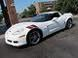

In [57]:
small_image_1 = 'DataSet/images/cars_train/' + train_data['fname'][96]
print("train_data name", train_data['fname'][96])
img1 = tf.keras.preprocessing.image.load_img(small_image_1)


small_image_2 = 'DataSet/images/cars_train/' + train_data['fname'][9710]
print("train_data name", train_data['fname'][9710])
img2 = tf.keras.preprocessing.image.load_img(small_image_2)
img1

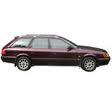

In [58]:
img2

### Crop and Resize the Training DataSet images to 224x224 pixels:

> *Cropping the images using bounding boxes and separating the images into their respective folders accoringly.*

*   Read the dataset from CSV file
*   Iterate over each image, resize it and its bounding box in CSV
*   **Crop the image using bounding box coordinates**
*   Resize the croppedImage to 224x224 pixels (CNNs can easily train on square images)
*   Save the cropped resize image
*   ~~Update the bounding box coordinates in the new dataframe called `train_data_resized`.~~

> *Resizing the dataset to a square size  helps in training the model much faster as we deal with image datasets which inturn uses matrix multiplications for this type of problem*




> ***Choosing 224x224 as an ideal choice since it may contain more details of each car for classification***

In [59]:
new_size = (224,224)

In [60]:
import os, shutil, pathlib

In [61]:
# Image Cropper Function
def ImageCropper(save_path, class_name, image_path, x1, y1, x2, y2):
  im = Image.open(image_path);
  croppedImage = im.crop((x1, y1, x2, y2))

  # print("Cropping Finished")
  filename = os.path.basename(image_path)
  # class_image_save_path = save_path + "/" + str(class_name) + "/" # this line separates all the images to separate folders according to the class no.
  class_image_save_path = save_path + "/" + str(class_name) + "/"

  if not os.path.exists(class_image_save_path):
    os.makedirs(class_image_save_path)

  resized_image = croppedImage.resize(new_size)

  #save the resized image
  if not os.path.exists(class_image_save_path):
    os.makedirs(class_image_save_path)

  resized_image.save(os.path.join(class_image_save_path, filename))



In [62]:
!rm -r DataSet/croppedResizedImages/

rm: cannot remove 'DataSet/croppedResizedImages/': No such file or directory


In [63]:
# dataset folder
train_dataset_image_folder = 'DataSet/images/cars_train/'
validation_dataset_image_folder = 'DataSet/images/cars_validation/'
test_dataset_image_folder = 'DataSet/images/cars_test/'

train_cropped_images_save_path ='DataSet/croppedResizedImages/train' #setting a custom path for storing the resized data
validation_cropped_images_save_path ='DataSet/croppedResizedImages/validation' #setting a custom path for storing the resized data
test_cropped_images_save_path ='DataSet/croppedResizedImages/test' #setting a custom path for storing the resized data

In [64]:
print(len(train_data))

9711


In [65]:
# process each image - cropping

def processCrop(crop_images_save_path, dataset_image_folder, data_df):
  for index, row in data_df.iterrows():

    # Call the image cropper function
    ImageCropper(crop_images_save_path, data_df['class'][index] , dataset_image_folder + data_df['fname'][index], data_df['x1'][index], data_df['y1'][index], data_df['x2'][index], data_df['y2'][index])

    if index == len(data_df) - 1:
      print(crop_images_save_path, ": All Images have been cropped")



In [66]:
processCrop(train_cropped_images_save_path, train_dataset_image_folder, train_data)
processCrop(validation_cropped_images_save_path, validation_dataset_image_folder, validation_data)
processCrop(test_cropped_images_save_path, test_dataset_image_folder, test_data)

DataSet/croppedResizedImages/train : All Images have been cropped
DataSet/croppedResizedImages/test : All Images have been cropped


Using `image_dataset_from_directort` to read the cropped and resized images

Creating a variable for resized data that we can use to update the bounding box information

In [67]:
from keras.utils import image_dataset_from_directory
cropped_dataset_directory = "/content/DataSet/croppedResizedImages/"

train_dataset = image_dataset_from_directory(
    cropped_dataset_directory + "/train",
    image_size=(224, 224),
)
validation_dataset = image_dataset_from_directory(
    cropped_dataset_directory + "/validation",
    image_size=(224, 224),
)
test_dataset = image_dataset_from_directory(
    cropped_dataset_directory + "/test",
    image_size=(224, 224),
)

Found 9711 files belonging to 196 classes.
Found 3237 files belonging to 196 classes.
Found 3237 files belonging to 196 classes.


In [68]:
# !ls DataSet/images/cars_train #uncomment to see the no. of images we have

In [69]:
# !ls DataSet/resized_images/ #let's see the count of resized cropped images.

## Check the resized image.

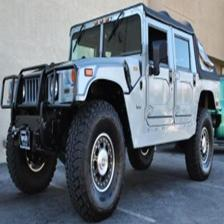

In [70]:
scaled_img = tf.keras.preprocessing.image.load_img('DataSet/croppedResizedImages/train/1/00163.jpg')
scaled_img

#Prepare the Data for Machine Learning Algorithms

Checking we have any missing value

In [71]:
sample_incomplete_rows = train_data[train_data.isnull().any(axis=1)].head() #maybe we don't have any missing data
pd.set_option('display.max_columns', None)
sample_incomplete_rows

,Unnamed: 0,x1,y1,x2,y2,class,fname


> WE DON'T HAVE TO DO NORMALIZATION AS WE DID IT WHEN WE RESIZED THE IMAGES TO SAME RESOLUTION


### This step helps in training the transfer learning model much easier.

# Load all the Images to start traning


In [72]:
import cv2  # Or from PIL import Image  if using Pillow

Define data paths

In [73]:
image_train_data_dir = "DataSet/croppedResizedImages/train"
image_validation_data_dir = "DataSet/croppedResizedImages/validation"
image_test_data_dir = "DataSet/croppedResizedImages/test"

In [74]:
def load_image(filepath, target_size=(224, 224)):  # Adjust target size if needed
    img = cv2.imread(filepath)  # Or img = Image.open(filepath) for Pillow
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if using OpenCV
    img = cv2.resize(img, target_size)
    return img

### Prepare Training Data

Creating a dictionary to map image filenames to their corresponding class labels

In [75]:
image_label_map = dict(zip(train_data["fname"], train_data["class"]))  # Adjust column names if needed

###  Data Augmentation (Highly Recommended):

Create an ImageDataGenerator object to perform on-the-fly data augmentation during training, which helps prevent overfitting and improve model generalization perform Data Augmentation

> **In Simple, we generate different transformations of images to increase the image dataset size and balance it for our training since we are extremely dealing with very small dataset.**

Since the dataset is limited, augmenting our data artificially increasing the diversity of our training data.

In [76]:
# Convert "class" column to string before using flow_from_dataframe
train_data['class'] = train_data['class'].astype(str)

In [77]:
# train_data_df = pd.concat([X_train, y_train], axis=1)
# train_data.columns = ['fname', 'class']

In [78]:
from tensorflow import keras
from keras import layers

In [79]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Reducing the rotation range for vehicle data is based on the assumption that, in real-world scenarios, vehicles are typically seen upright, and significant rotations (like those you might see with arbitrary objects) are not common.
# Vehicles rarely, if ever, appear upside-down or at steep angles in standard road scenes.


### Load and Augment Training Data:

Use train_datagen.flow_from_directory to automatically load, preprocess, and augment images from your training directory:

Use train_datagen.flow_from_dataframe to generate batches of images and labels from your DataFrame:

Displaying some randomly augmented training images

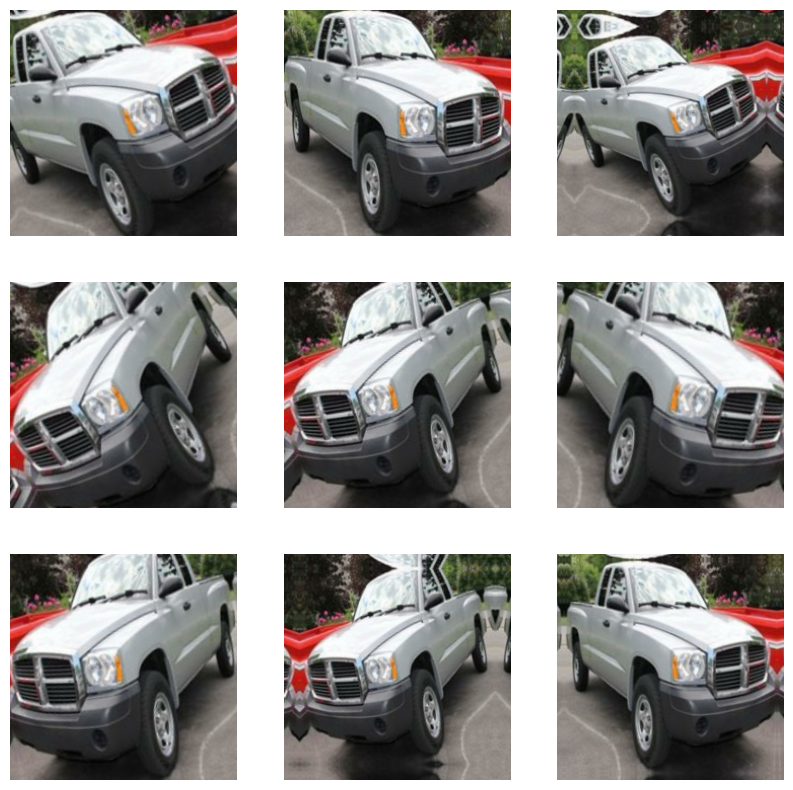

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Defining a new convnet that includes image augmentation and dropout

In [81]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(196, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

Training the regularized convnet

In [82]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
304/304 [==============================] - 20s 46ms/step - loss: 5.2177 - accuracy: 0.0093 - val_loss: 5.1722 - val_accuracy: 0.0151
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


304/304 [==============================] - 14s 45ms/step - loss: 5.1289 - accuracy: 0.0150 - val_loss: 5.1360 - val_accuracy: 0.0182
Epoch 3/50
304/304 [==============================] - 14s 47ms/step - loss: 5.0261 - accuracy: 0.0254 - val_loss: 4.9758 - val_accuracy: 0.0321
Epoch 4/50
304/304 [==============================] - 14s 47ms/step - loss: 4.8719 - accuracy: 0.0440 - val_loss: 4.9838 - val_accuracy: 0.0386
Epoch 5/50
304/304 [==============================] - 13s 42ms/step - loss: 4.7303 - accuracy: 0.0535 - val_loss: 4.8427 - val_accuracy: 0.0482
Epoch 6/50
304/304 [==============================] - 14s 45ms/step - loss: 4.5817 - accuracy: 0.0720 - val_loss: 4.6511 - val_accuracy: 0.0729
Epoch 7/50
304/304 [==============================] - 13s 42ms/step - loss: 4.4192 - accuracy: 0.0898 - val_loss: 4.5744 - val_accuracy: 0.0831
Epoch 8/50
304/304 [==============================] - 13s 43ms/step - loss: 4.2346 - accuracy: 0.1091 - val_loss: 4.3051 - val_accuracy: 0.1131
Epo

# Leveraging a pretrained model

## Feature extraction with a pretrained model

Instantiating the VGG16 convolutional base

In [83]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [84]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [85]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 33ms/step


In [86]:
train_features.shape

(9711, 7, 7, 512)

Defining and training the densely connected classifier

In [87]:
inputs = keras.Input(shape=(7, 7, 512))
x = layers.GlobalAveragePooling2D(input_shape=(7,7,512)) # ref: https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(196, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.h5",
      save_best_only=True,
      monitor="val_loss")
]

In [88]:
history = model.fit(
    train_features, train_labels,
    epochs=50,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/50
304/304 [==============================] - 3s 10ms/step - loss: 175.3816 - accuracy: 0.1003 - val_loss: 122.6054 - val_accuracy: 0.1962
Epoch 2/50
304/304 [==============================] - 2s 6ms/step - loss: 70.1974 - accuracy: 0.4631 - val_loss: 89.3003 - val_accuracy: 0.3577
Epoch 3/50
304/304 [==============================] - 2s 6ms/step - loss: 44.2839 - accuracy: 0.6392 - val_loss: 85.2234 - val_accuracy: 0.4319
Epoch 4/50
304/304 [==============================] - 3s 9ms/step - loss: 32.7537 - accuracy: 0.7321 - val_loss: 80.8906 - val_accuracy: 0.4813
Epoch 5/50
304/304 [==============================] - 2s 7ms/step - loss: 27.1804 - accuracy: 0.7727 - val_loss: 83.3753 - val_accuracy: 0.5026
Epoch 6/50
304/304 [==============================] - 2s 6ms/step - loss: 23.3216 - accuracy: 0.8127 - val_loss: 85.1965 - val_accuracy: 0.5162
Epoch 7/50
304/304 [==============================] - 2s 6ms/step - loss: 19.3303 - accuracy: 0.8422 - val_loss: 90.0999 - val_accura

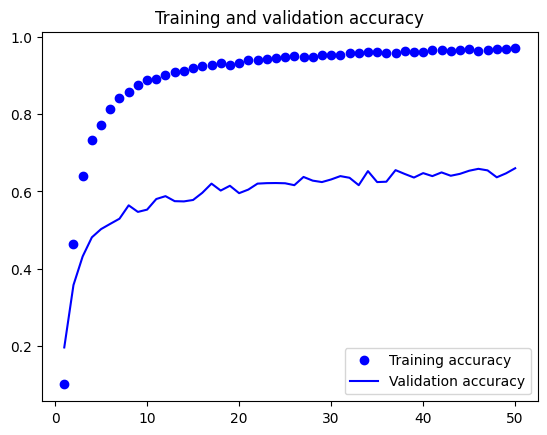

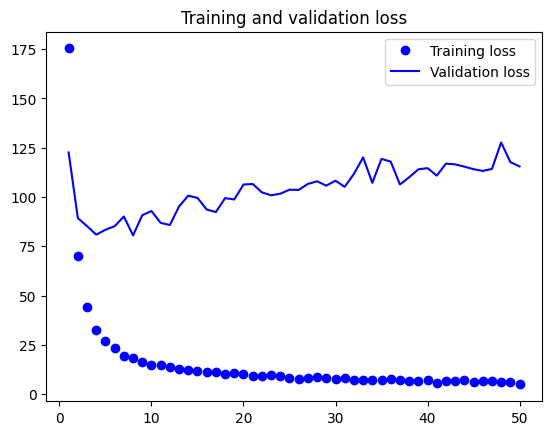

In [89]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Feature extraction together with data augmentation

Instantiating and freezing the VGG16 convolutional base

In [90]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [91]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 24ms/step


Adding a data augmentation stage and a classifier to the convolutional base

In [92]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(196, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [93]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]

In [94]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
304/304 [==============================] - 22s 66ms/step - loss: 170.5228 - accuracy: 0.0563 - val_loss: 145.1686 - val_accuracy: 0.1365
Epoch 2/50
304/304 [==============================] - 20s 65ms/step - loss: 132.9891 - accuracy: 0.1720 - val_loss: 88.1333 - val_accuracy: 0.2904
Epoch 3/50
304/304 [==============================] - 21s 67ms/step - loss: 109.1172 - accuracy: 0.2684 - val_loss: 80.1559 - val_accuracy: 0.3528
Epoch 4/50
304/304 [==============================] - 20s 65ms/step - loss: 96.0409 - accuracy: 0.3250 - val_loss: 83.2019 - val_accuracy: 0.3877
Epoch 5/50
304/304 [==============================] - 20s 66ms/step - loss: 83.8781 - accuracy: 0.3920 - val_loss: 74.1158 - val_accuracy: 0.4510
Epoch 6/50
304/304 [==============================] - 20s 66ms/step - loss: 78.5406 - accuracy: 0.4234 - val_loss: 62.2656 - val_accuracy: 0.4964
Epoch 7/50
304/304 [==============================] - 21s 68ms/step - loss: 70.7604 - accuracy: 0.4668 - val_loss: 61.59

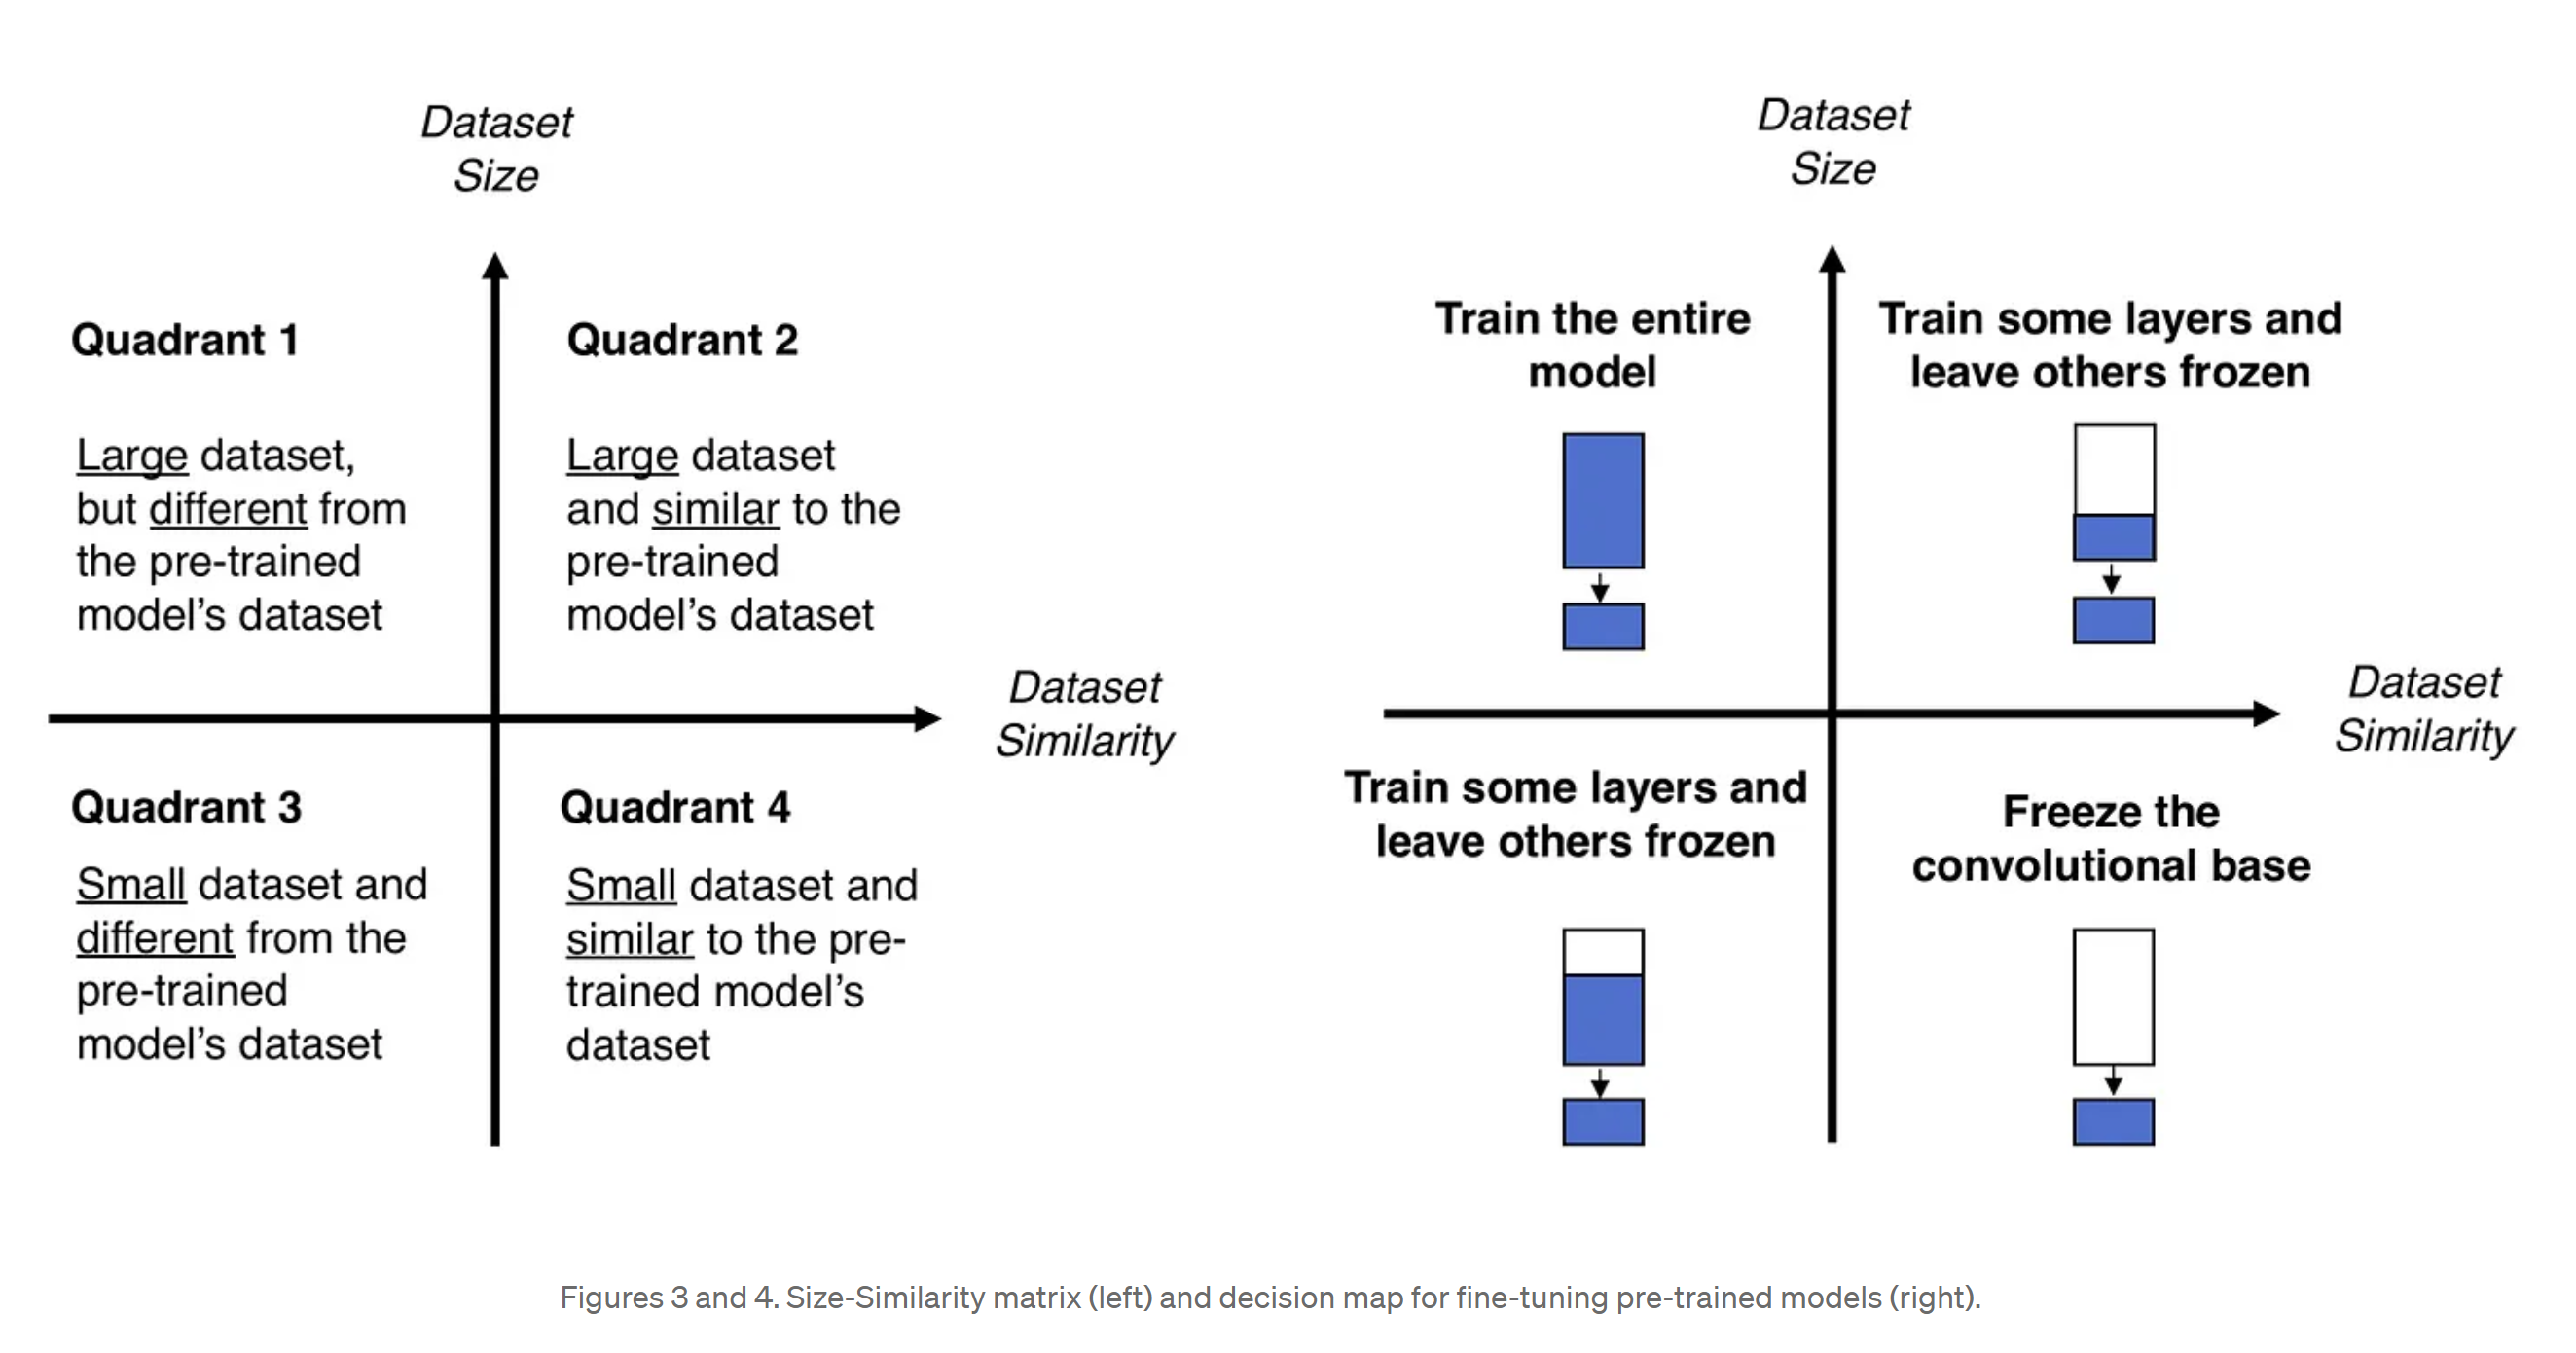

Reference: https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751

# Fine Tuning the Model
Freezing all layers until the fourth from the last

In [95]:
conv_base.trainable = True
for layer in conv_base.layers[:15]:
    layer.trainable = False

# Make sure you have frozen the correct layers
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_4 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


Fine-tuning the model with image augmentation

In [100]:
# inputs = keras.Input(shape=(224, 224, 3))
# x = data_augmentation(inputs)
# x = keras.applications.vgg16.preprocess_input(x)
# x = conv_base(x)
# x = layers.Flatten()(x)
# x = layers.Dense(256)(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(196, activation="softmax")(x)
# model = keras.Model(inputs, outputs)

inputs = keras.Input(shape=(224, 224, 3))
y = data_augmentation(inputs)
y = keras.applications.vgg16.preprocess_input(y)
y = conv_base(y)
y = layers.Flatten()(y) # Flatten dimensions to for use in FC layers
y = layers.Dense(512, activation='relu')(y)
y = layers.Dense(256, activation='relu')(y)
y = layers.Dropout(0.5)(y) # Dropout layer to reduce overfitting
outputs = layers.Dense(196, activation='softmax')(y) # Softmax for multiclass

# Create Custom Model
transfer_model = keras.Model(inputs, outputs)
for i, layer in enumerate(transfer_model.layers):
  print(i, layer.name, layer.trainable)

0 input_9 True
1 sequential True
2 tf.__operators__.getitem_4 True
3 tf.nn.bias_add_4 True
4 vgg16 True
5 flatten_6 True
6 dense_13 True
7 dense_14 True
8 dropout_6 True
9 dense_15 True


In [101]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.h5",
        save_best_only=True,
        monitor="val_loss")
]

In [102]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
304/304 [==============================] - ETA: 0s - loss: 52.8338 - accuracy: 0.6008

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


304/304 [==============================] - 24s 64ms/step - loss: 52.8338 - accuracy: 0.6008 - val_loss: 54.8245 - val_accuracy: 0.6117
Epoch 2/100
304/304 [==============================] - 19s 62ms/step - loss: 51.4989 - accuracy: 0.6065 - val_loss: 56.8900 - val_accuracy: 0.6092
Epoch 3/100
304/304 [==============================] - 20s 64ms/step - loss: 50.2464 - accuracy: 0.6187 - val_loss: 61.8039 - val_accuracy: 0.5938
Epoch 4/100
304/304 [==============================] - 20s 65ms/step - loss: 50.9538 - accuracy: 0.6241 - val_loss: 49.4769 - val_accuracy: 0.6487
Epoch 5/100
304/304 [==============================] - 19s 61ms/step - loss: 47.8810 - accuracy: 0.6387 - val_loss: 58.1231 - val_accuracy: 0.6200
Epoch 6/100
304/304 [==============================] - 19s 63ms/step - loss: 46.7385 - accuracy: 0.6448 - val_loss: 49.1223 - val_accuracy: 0.6521
Epoch 7/100
304/304 [==============================] - 19s 61ms/step - loss: 47.8178 - accuracy: 0.6512 - val_loss: 53.9752 - val_

In [103]:
model = keras.models.load_model("feature_extraction_with_data_augmentation.h5")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

102/102 [==============================] - 5s 44ms/step - loss: 54.3780 - accuracy: 0.6067
Test accuracy: 0.607


In [104]:
model = keras.models.load_model("fine_tuning.h5")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

102/102 [==============================] - 6s 52ms/step - loss: 52.1513 - accuracy: 0.6478
Test accuracy: 0.648


1/1 [==============================] - 0s 18ms/step


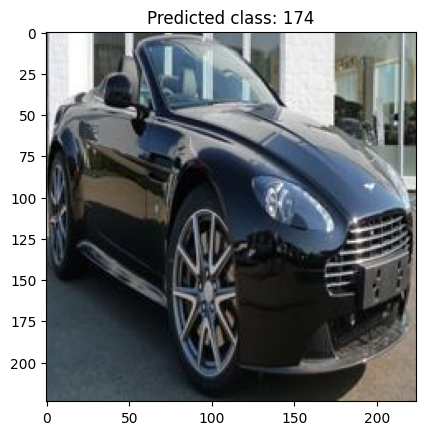

In [129]:
# prompt: predict the image on trained model  and show image

import matplotlib.pyplot as plt
import numpy as np
image_path = "/content/DataSet/croppedResizedImages/test/8/00239.jpg"

# Load the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))

# Preprocess the image
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.vgg16.preprocess_input(x)

# Make prediction
predictions = model.predict(x)
predicted_class = np.argmax(predictions)

# Show the image
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.show()
